In [67]:
import os
from glob import glob
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from uavsar_pytools.uavsar_tools import read_annotation
import pandas as pd

In [3]:
main_dir = '/SNOWDATA/uavsar/lowman_stack/232/'

In [69]:
for i, d in enumerate(os.listdir(main_dir)):
    for f in glob(os.path.join(main_dir, d, 'tmp','bin_imgs','*ann')):
        desc = read_annotation(f)
        flight1 = pd.to_datetime(desc['start time of acquisition for pass 1']['value']).strftime("%m/%d/%y")
        flight2 = pd.to_datetime(desc['start time of acquisition for pass 2']['value']).strftime("%m/%d/%y")

In [70]:
print(flight1)

01/20/21


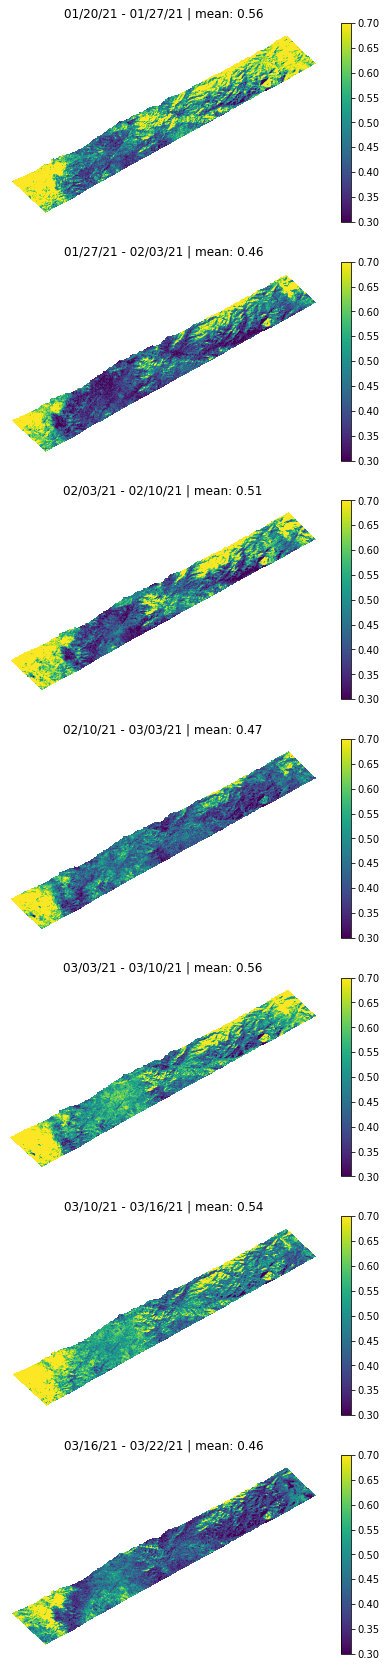

In [81]:
f, axes = plt.subplots(len(glob(os.path.join(main_dir,'*'))), figsize  = (8,30))
for i, d in enumerate(sorted(os.listdir(main_dir))):
    for f in glob(os.path.join(main_dir, d, 'tmp','bin_imgs','*ann')):
        desc = read_annotation(f)
        flight1 = pd.to_datetime(desc['start time of acquisition for pass 1']['value']).strftime("%m/%d/%y")
        flight2 = pd.to_datetime(desc['start time of acquisition for pass 2']['value']).strftime("%m/%d/%y")
    for f in glob(os.path.join(main_dir, d, 'tiffs','*HH*cor*')):
        with rasterio.open(f) as src:
            arr = src.read(1)
            mean = (np.nanmean(arr))
            ax = axes[i]
            cbar = ax.imshow(arr[::10,::10], vmin = 0.3, vmax = 0.7)
            plt.colorbar(cbar, ax = ax)
            ax.axis('off')
            name = os.path.basename(f).split('_')[2:5]
            ax.set_title(f'{flight1} - {flight2} | mean: {mean:.2f}')
plt.show()